In [39]:
import requests as regs
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from stocksymbol import StockSymbol
import glob
from pathlib import Path
import re 
import os
import shutil
import reticker
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
import random
import matplotlib.pyplot as plt
from pprint import pprint
tf.get_logger().setLevel('ERROR')
from GoogleNews import GoogleNews
googlenews = GoogleNews()
%matplotlib inline
from gnewsclient import gnewsclient
api_key = '51f442a4fab8401ca0e0bc020ee6ae90'

ImportError: cannot import name 'optimization' from 'official.nlp' (/opt/homebrew/Caskroom/miniforge/base/envs/tf/lib/python3.9/site-packages/official/nlp/__init__.py)

In [8]:
url1 = ('https://newsapi.org/v2/everything?'
       'q=stocks&'
       'from=2022-07-12&'
       'sortBy=relevancy&'
       'page=1&'
       'apiKey=51f442a4fab8401ca0e0bc020ee6ae90')

url2 = ('https://newsapi.org/v2/everything?'
       'q=stocks&'
       'from=2022-07-12&'
       'sortBy=relevancy&'
       'page=2&'
       'apiKey=51f442a4fab8401ca0e0bc020ee6ae90')

url3 = ('https://newsapi.org/v2/everything?'
       'q=stocks&'
       'from=2022-07-12&'
       'sortBy=relevancy&'
       'page=3&'
       'apiKey=51f442a4fab8401ca0e0bc020ee6ae90')

response1 = regs.get(url1)
response2 = regs.get(url2)
response3 = regs.get(url3)

dict1 = response1.json()
dict2 = response2.json()
dict3 = response3.json()



In [9]:
url_list = []
articles = dict1['articles'] + dict2['articles'] + dict3['articles']

for item in articles:
    if item not in url_list:
        url_list.append(item['url'])
print(len(url_list))

300


In [10]:
def get_html(my_url):
    article = ''
    response = regs.request('GET', url = my_url, verify = True)
    soup = BeautifulSoup(response.content, 'html.parser')
    for item in soup.find_all('p'):
        article = article + item.text
    return article

text_list = [get_html(item) for item in url_list]


In [11]:
ss = StockSymbol('abc2b86f-3c33-44fc-b01b-926a904bd13c')
symbol_list_us = ss.get_symbol_list(market="US")
def get_sym(big_list):
    new_list = []
    for item in big_list:
        new_list.append(item['symbol'])
    return new_list

my_sym_list = get_sym(symbol_list_us)

In [12]:
def get_ticker(list):
    ticker_list = []
    pair = []
    for text in list:
        count = 0
        tick = reticker.TickerExtractor().extract(text)
        
        for item in tick:
            if item in my_sym_list:
                
                if count!= 2:
                    match = re.search(item, text)                        
                    pair = []
                    start = match.start() - 500
                    end = match.end() + 500
                    if start < 0:
                        start = 0
                        
                    if end > len(text) - 1:
                        end = -1
                    chunk = text[start:end]
                    pair.append(text[match.start():match.end()])
                    pair.append(chunk)
                    ticker_list.append(pair)
                    count = count + 1
                else:
                    break
    return ticker_list
poss_ticker = get_ticker(text_list)

In [46]:
temp_df = pd.DataFrame(poss_ticker)
temp_df = temp_df.rename(columns={0 : "Match", 1 : 'Text'})
temp_df.to_excel('C:\\Users\\Dina\\Desktop\\Michael Coding\\Stock Scaper\\unscored_data_frame.xlsx')

In [15]:
data_frame_list = pd.read_excel('/Users/michaelscoleri/Desktop/Coding/Personal/Python/Stock_scraper/scored_input.xlsx')


In [46]:
[f.unlink() for f in Path('/Users/michaelscoleri/Desktop/Coding/Personal/Python/Stock_scraper/Test/pos/').glob("*") if f.is_file()]
[f.unlink() for f in Path('/Users/michaelscoleri/Desktop/Coding/Personal/Python/Stock_scraper/Test/neg/').glob("*") if f.is_file()]
[f.unlink() for f in Path('/Users/michaelscoleri/Desktop/Coding/Personal/Python/Stock_scraper/Train/pos/').glob("*") if f.is_file()]
[f.unlink() for f in Path('/Users/michaelscoleri/Desktop/Coding/Personal/Python/Stock_scraper/Train/neg/').glob("*") if f.is_file()]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [47]:
count = 0
prob_list = [1,1,1,1,1,1,1,1,0,0,0]
random.seed(10)
for index, row in data_frame_list.iterrows():
    index_number = random.randrange(0,10)
    if type(row['Text']) is float:
        print(row['Text'], index)
    if row["Score"] == 1:
        if prob_list[index_number] == 0:
            name = 'pos' + str(count) + '.txt'
            file = open('/Users/michaelscoleri/Desktop/Coding/Personal/Python/Stock_scraper/Test/pos/' + name, 'w', encoding = 'utf-8')
            file.write(row['Text'])
        else:
            name = 'pos' + str(count) + '.txt'
            file = open('/Users/michaelscoleri/Desktop/Coding/Personal/Python/Stock_scraper/Train/pos/' + name, 'w', encoding = 'utf-8')
            file.write(row['Text'])
    else:
        if prob_list[index_number] == 0:
            name = 'neg' + str(count) + '.txt'
            file = open('/Users/michaelscoleri/Desktop/Coding/Personal/Python/Stock_scraper/Test/neg/' + name, 'w', encoding = 'utf-8')
            file.write(row['Text'])
        else:
            name = 'neg' + str(count) + '.txt'
            file = open('/Users/michaelscoleri/Desktop/Coding/Personal/Python/Stock_scraper/Train/neg/' + name, 'w', encoding = 'utf-8')
            file.write(row['Text'])
    count += 1       

In [48]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 16
seed = 42

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'Train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.keras.utils.text_dataset_from_directory(
    '/Users/michaelscoleri/Desktop/Coding/Personal/Python/Stock_scraper/Train/',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.keras.utils.text_dataset_from_directory(
    '/Users/michaelscoleri/Desktop/Coding/Personal/Python/Stock_scraper/Test/',
    batch_size=batch_size)

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 233 files belonging to 2 classes.
Using 187 files for training.
Found 233 files belonging to 2 classes.
Using 46 files for validation.
Found 59 files belonging to 2 classes.


In [70]:
bert_model_name = 'small_bert/bert_en_uncased_L-12_H-512_A-8'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [71]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [72]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

classifier_model = build_classifier_model()


In [73]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()
epochs = 10
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = tf.keras.optimizers.Adam(learning_rate=init_lr)

classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [74]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1
Epoch 1/10
12/12 [==============================] - 28s 2s/step - loss: 0.6606 - binary_accuracy: 0.5722 - val_loss: 0.5446 - val_binary_accuracy: 0.7174
Epoch 2/10
12/12 [==============================] - 21s 2s/step - loss: 0.5002 - binary_accuracy: 0.7754 - val_loss: 0.4309 - val_binary_accuracy: 0.7826
Epoch 3/10
12/12 [==============================] - 20s 2s/step - loss: 0.3176 - binary_accuracy: 0.8770 - val_loss: 0.4731 - val_binary_accuracy: 0.7174
Epoch 4/10
12/12 [==============================] - 20s 2s/step - loss: 0.2322 - binary_accuracy: 0.9198 - val_loss: 0.5188 - val_binary_accuracy: 0.7174
Epoch 5/10
12/12 [==============================] - 20s 2s/step - loss: 0.1401 - binary_accuracy: 0.9412 - val_loss: 0.4652 - val_binary_accuracy: 0.8696
Epoch 6/10
12/12 [==============================] - 20s 2s/step - loss: 0.1013 - binary_accuracy: 0.9626 - val_loss: 0.3635 - val_binary_

In [76]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

4/4 [==============================] - 2s 535ms/step - loss: 0.6458 - binary_accuracy: 0.8305
Loss: 0.6458162069320679
Accuracy: 0.8305084705352783


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


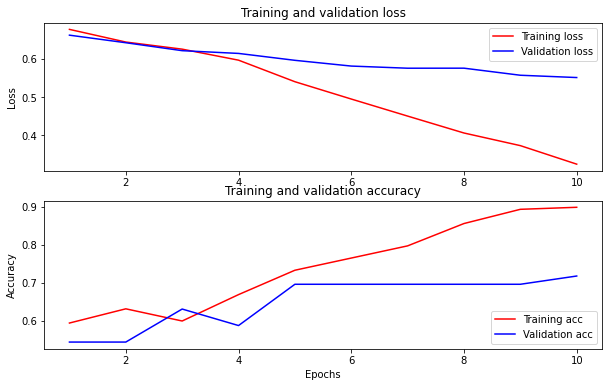

In [65]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [66]:
dataset_name = 'Scaper3.0'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)